In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ggplot import *
plt.style.use('ggplot')
color = sns.color_palette()
%matplotlib inline

# Import the Dataset

In [121]:
df = pd.read_csv('Iris.csv')

In [122]:
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [123]:
# drop the specie categories to 
iris = df.drop(['Species', 'Id'], axis=1)

In [124]:
iris.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [125]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
dtypes: float64(4)
memory usage: 4.8 KB


# Elbow Plot

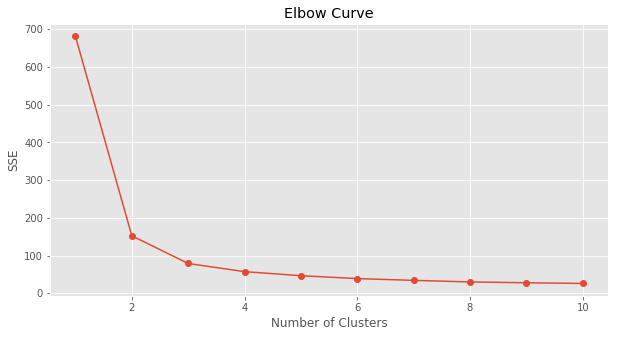

In [126]:
from sklearn.cluster import KMeans

# create an empty list to store the "elbows"
el = []

# test model on set of integers to identify optimial k value
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(iris)
    el.append(kmeans.inertia_)
    
# plot the results onto a line graph to show the "elbow"
plt.figure(figsize=(10,5))
plt.plot(range(1, 11), el, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE') 
plt.title('Elbow Curve')
plt.show()

#according the Elow plot below, we should choose 3 clusters

# KMeans Model

In [144]:
# create dataframe for clustering
cluster = iris[['SepalLengthCm','SepalWidthCm']].copy()
cluster = cluster.values

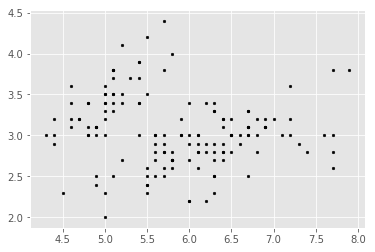

In [145]:
plt.scatter(cluster[:, 0], cluster[:, 1], c='black', s=7)

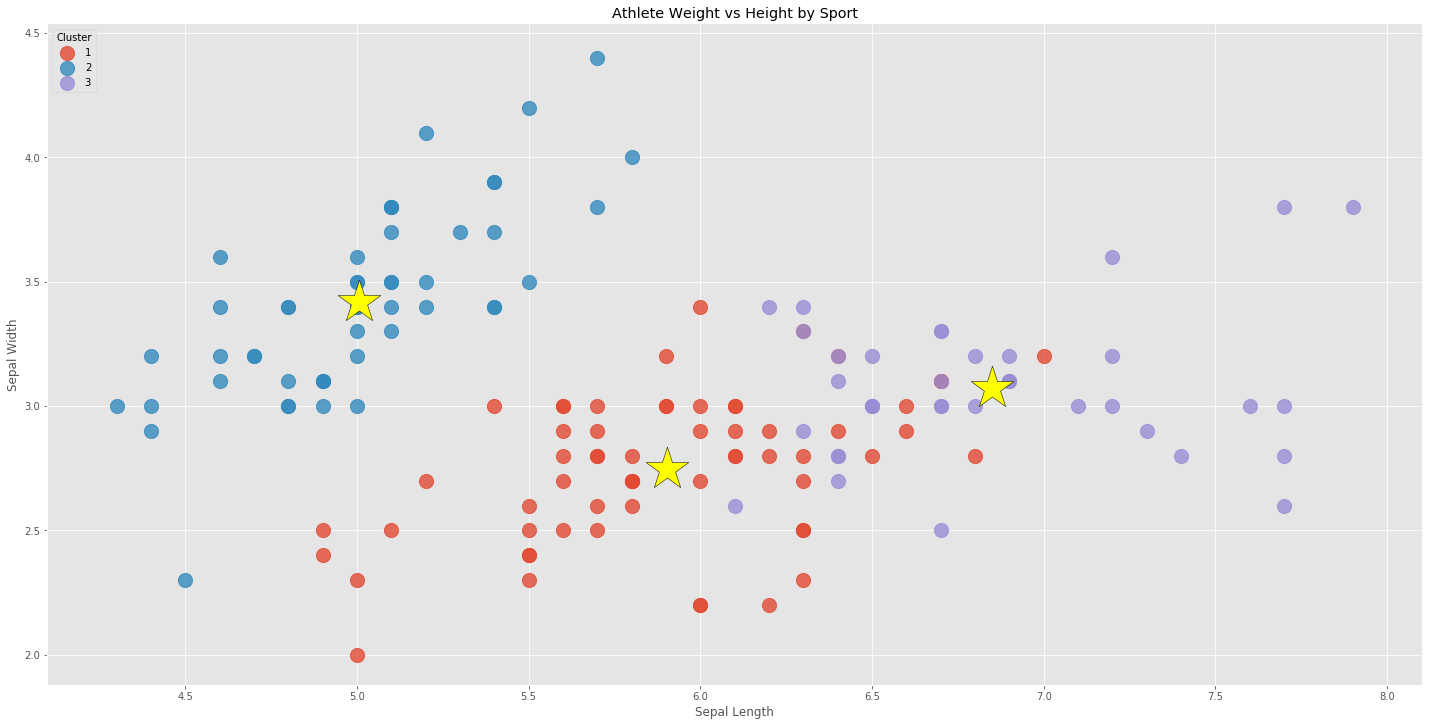

In [146]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = pd.DataFrame(kmeans.fit_predict(iris_array), dtype='int32')
y_kfit = kmeans.fit_predict(iris_array)

# Merge clusters for final clustered data frame
sepal_length_1 = cluster[y_kfit == 0, 0]
sepal_width_1 = cluster[y_kfit == 0, 1]
cluster_1 = pd.DataFrame({'SepalLengthCm':sepal_length_1, 'SepalWidthCm':sepal_width_1, 'cluster':1})

sepal_length_2 = cluster[y_kfit == 1, 0]
sepal_width_2 = cluster[y_kfit == 1, 1]
cluster_2 = pd.DataFrame({'SepalLengthCm':sepal_length_2, 'SepalWidthCm':sepal_width_2, 'cluster':2})

sepal_length_3 = cluster[y_kfit == 2, 0]
sepal_width_3 = cluster[y_kfit == 2, 1]
cluster_3 = pd.DataFrame({'SepalLengthCm':sepal_length_3, 'SepalWidthCm':sepal_width_3, 'cluster':3})

cluster_final = pd.concat([cluster_1, cluster_2, cluster_3], axis=0)

# Generate plot to identify spread of driving metric distributions
dx = sns.lmplot(x='SepalLengthCm', y='SepalWidthCm', data=cluster_final, hue='cluster', fit_reg=False, size=10, aspect=2, legend=False, scatter_kws={"s": 200})
dx.set(xlabel='Sepal Length', ylabel='Sepal Width', title="Athlete Weight vs Height by Sport")
plt.legend(loc='upper left', title='Cluster')

# Plot centroids
plt.scatter(kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    s=2000, marker='*',
    c='yellow', edgecolor='black',
    label='centroids')
plt.show()

# Silhouette Plot

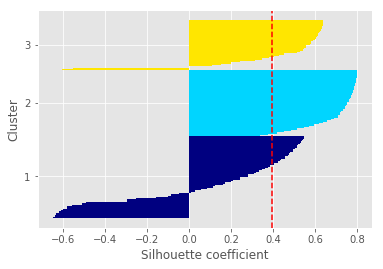

In [147]:
from sklearn.metrics import silhouette_samples
from matplotlib import cm

cluster_labels = np.unique(y_kfit)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(dataset_array, y_kfit, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_kfit == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower,y_ax_upper),
            c_silhouette_vals,
            height=1.0,
            edgecolor='none',
            color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()